In [1]:
# 导入 networkx 包
import networkx as nx
import matplotlib.pyplot as plt

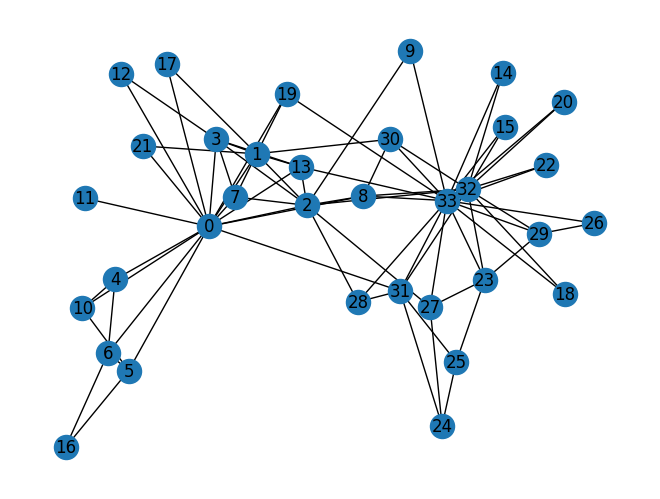

In [22]:
# 创建一个空手道俱乐部网络
G = nx.karate_club_graph()
# G is an undirected graph
type(G)
# 可视化图
nx.draw(G, with_labels = True)


In [5]:
# 网络平均度的计算
def average_degree(num_edges, num_nodes):
    # this function takes number of edges and number of nodes
    # returns the average node degree of the graph. 
    # Round the result to nearest integer (for example 3.3 will be rounded to 3 and 3.7 will be rounded to 4)
    avg_degree = 0
    #########################################
    avg_degree = 2*num_edges/num_nodes
    avg_degree = int(round(avg_degree))
    #########################################
    return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))


Average degree of karate club network is 5


In [6]:
def average_clustering_coefficient(G):
    # this function that takes a nx.Graph
    # and returns the average clustering coefficient. 
    # Round the result to 2 decimal places (for example 3.333 will be rounded to 3.33 and 3.7571 will be rounded to 3.76)
    avg_cluster_coef = 0
    #########################################
    ## Note: 
    ## 1: Please use the appropriate NetworkX clustering function
    avg_cluster_coef = nx.average_clustering(G)
    avg_cluster_coef = round(avg_cluster_coef, 2)
    #########################################
    return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))


Average clustering coefficient of karate club network is 0.57


Average clustering coefficient of karate club network is 0.0


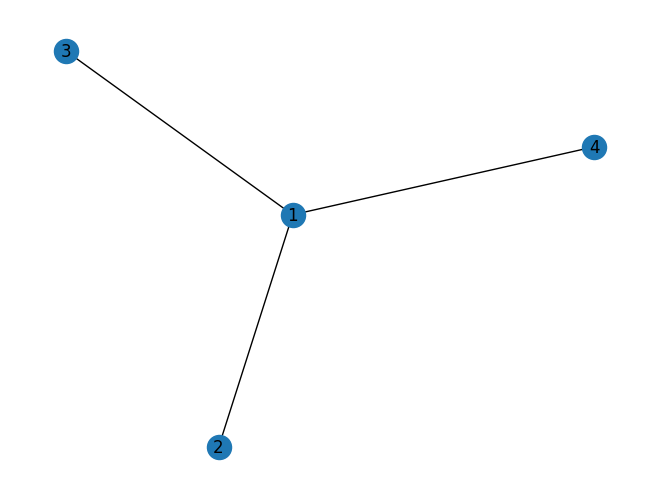

In [37]:
#定义一个图
G = nx.Graph()
#添加节点
G.add_edges_from([(1, 2), (1, 3), (1,4)])

#可视化图
nx.draw(G, with_labels = True)
avg_cluster_coef = nx.average_clustering(G)
avg_cluster_coef = round(avg_cluster_coef, 2)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

In [32]:
def closeness_centrality(G, node=1):
    # the function that calculates closeness centrality 
    # for a node in karate club network. G is the input karate club 
    # network and node is the node id in the graph. Please round the 
    # closeness centrality result to 2 decimal places.

    closeness = 0
    #########################################
    # Raw version following above equation
    # source: https://stackoverflow.com/questions/31764515/find-all-nodes-connected-to-n
    path_length_total = 0 
    for path in list(nx.single_source_shortest_path(G,node).values())[1:]:
        path_length_total += len(path)-1

    closeness = 1 / path_length_total
    closeness = round(closeness, 2)

    return closeness

node = 2
closeness = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality (raw) {:.2f}".format(closeness))


The karate club network has closeness centrality (raw) 0.20


In [33]:
# Normalized version from NetworkX
# Notice that networkx closeness centrality returns the normalized 
# closeness directly, which is different from the raw (unnormalized) 
# one that we learned in the lecture.
closeness = nx.closeness_centrality(G, node)
print("The karate club network has closeness centrality (normalzied) {:.2f}".format(closeness))


The karate club network has closeness centrality (normalzied) 0.60


In [38]:
# 使用节点的度数创建对角矩阵
degrees = [G.degree(n) for n in G.nodes()]
degree_matrix = np.diag(degrees)

# 打印度矩阵
print("Degree Matrix:\n", degree_matrix)

Degree Matrix:
 [[3 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [36]:
import networkx as nx
import numpy as np

# 创建一个无向图
G = nx.Graph()

# 添加顶点
G.add_nodes_from([1, 2, 3, 4])

# 添加边
G.add_edges_from([(1, 2), (1, 3), (2, 4)])

# 使用节点的度数创建对角矩阵
degrees = [G.degree(n) for n in G.nodes()]
degree_matrix = np.diag(degrees)

# 打印度矩阵
print("Degree Matrix:\n", degree_matrix)


Degree Matrix:
 [[2 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 0 0 1]]


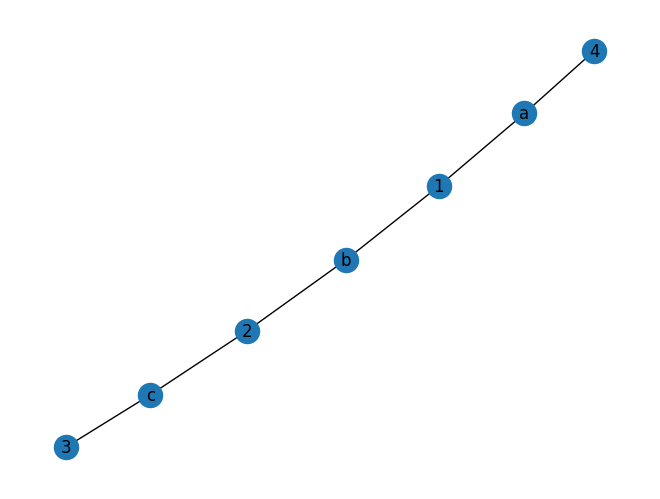

In [42]:
# 创建一个二分图 Bipartite Graph
from networkx.algorithms import bipartite
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
#显示图
nx.draw(B, with_labels = True) 

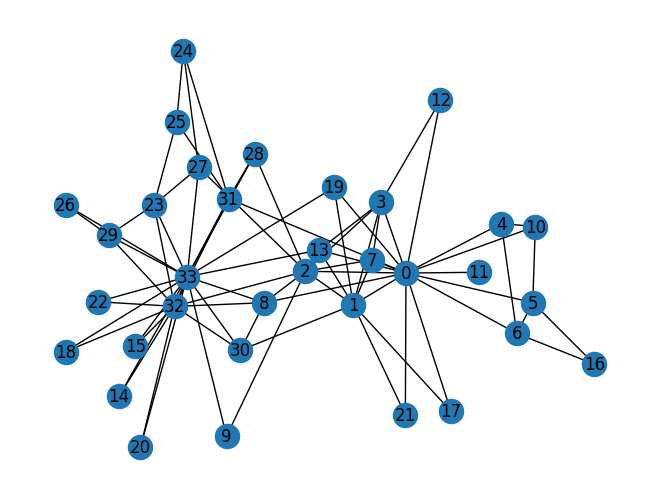

In [1]:
import networkx as nx
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 载入空手道俱乐部网络
G = nx.karate_club_graph()
# 可视化图
nx.draw(G, with_labels = True)


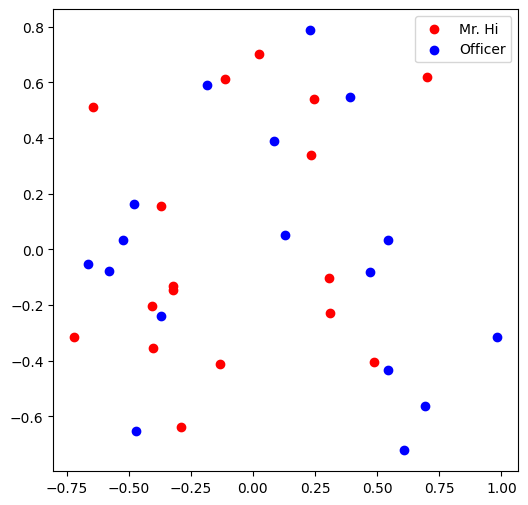

In [2]:
torch.manual_seed(1)
torch.manual_seed(1)

# 初始化嵌入函数
def create_node_emb(num_node=34, embedding_dim=16):
  emb=nn.Embedding(num_node,embedding_dim) # 创建 Embedding
  emb.weight.data=torch.rand(num_node,embedding_dim) # 均匀初始化
  return emb

# 初始化嵌入
emb = create_node_emb()

# 可视化
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
    #node的形式：第一个元素是索引，第二个元素是attributes字典
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
      #这里添加的元素就是节点对应的embedding经PCA后的两个维度
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# 可视化初始嵌入
visualize_emb(emb)